**<h1 style=" text-align:center;">Análisis sobre la incidencia del cigarrillo en la salud humana</h>**

*Fuente: Martín, profesor-CODER HOUSE*

<h2>Objetivo general</h2>
Estimar el impacto del hábito de fumar en la salud y en las variables médicas registradas en la tabla, identificando posibles correlaciones, patrones y diferencias significativas entre fumadores y no fumadores.

<h3>Objetivos específicos</h3>

1. Evaluar la relación entre el hábito de fumar y variables como peso, altura, circunferencia de cintura, hemoglobina, proteína en la orina, creatinina sérica, entre otras.

2. Determinar si existen diferencias significativas en la agudeza visual y auditiva entre fumadores y no fumadores.

3. Investigar posibles asociaciones entre el hábito de fumar y enfermedades bucodentales como caries dentales y sarro.

4. Analizar los niveles de enzimas hepáticas (AST, ALT, Gtp) en relación con el tabaquismo.



<h2>Abstract</h2>

En este estudio de ciencia de datos, se busca estimar el impacto del hábito de fumar en la salud y en diversas variables médicas registradas, mediante un análisis de exploración de datos (EDA) utilizando visualizaciones con las librerías Matplotlib y Seaborn. Se emplearán gráficos como boxplot, dispersión, histograma y correlación para identificar posibles relaciones, patrones y diferencias entre fumadores y no fumadores en función de las variables disponibles en la tabla.

A través de la visualización de datos con gráficos boxplot, se pretende comparar las distribuciones de las variables médicas entre fumadores y no fumadores, destacando posibles diferencias en medidas como peso, altura, circunferencia de cintura, hemoglobina, entre otras. Los gráficos de dispersión permitirán explorar la relación entre variables continuas y evaluar posibles asociaciones con el hábito de fumar.
Además, se utilizarán histogramas para analizar la distribución de los datos y comprender mejor la variabilidad en las medidas registradas. Por último, se empleará el análisis de correlación para cuantificar las relaciones lineales entre las variables y determinar posibles dependencias entre el tabaquismo y otras medidas médicas.

Este enfoque basado en el EDA y visualizaciones detalladas con Matplotlib y Seaborn permitirá obtener una comprensión más profunda del impacto del tabaquismo en la salud a partir de los datos disponibles, identificando patrones significativos que puedan ser relevantes para futuras investigaciones y decisiones en el ámbito de la salud pública.


<h2>Hipótesis</h2>

La hipótesis planteada es que los fumadores presentarán niveles más altos de enzimas hepáticas (AST, ALT, Gtp) en comparación con los no fumadores, lo que sugiere un posible impacto negativo del hábito de fumar en la función hepática. Esta hipótesis se basa en estudios previos que han demostrado una asociación entre el tabaquismo y el daño hepático, debido a la exposición a sustancias tóxicas presentes en el humo del cigarrillo.

Esta hipótesis podría ser negada si al analizar los datos no se encuentran diferencias significativas en los niveles de enzimas hepáticas entre fumadores y no fumadores, lo que indicaría que otros factores podrían estar influyendo en la función hepática más allá del hábito de fumar. La negación de esta hipótesis abriría la puerta a explorar otros posibles factores que puedan estar relacionados con la salud hepática y que no estén directamente vinculados al tabaquismo.

<h2>Contexto comercial</h2>

Las empresas que desarrollan tecnología médica podrían utilizar estos hallazgos para crear dispositivos o soluciones innovadoras destinadas a ayudar a los fumadores a dejar el hábito o a monitorear su salud de manera más efectiva.

**<h2>EDA<h2>**

A continuación procederemos a importar las librerías a utilizar durante el proceso de análisis de la data registrada que nos ayudarán a realizar el trabajo estadistico y la representación gráfica de los resultados, además, también llamaremos a nuestra base de datos en formato .CSV almacenada de forma local en el ordenador. Por ultimo, tambien nos permitirá ejecutar el modelo de regresión seleccionado para la estimación de los datos buscados. 

1. Numpy
2. Pandas
3. Matplotlib
4. seaborn
5. Sklearn:
 
   1.1. LabelEncoder

   1.2. train_test_split

   1.3. StandardScaler

   1.4. KNeighborsRegressor
   
   1.5. mean_squared_error, mean_absolute_error, r2_score


In [78]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=pd.read_csv('7_smoking_prediction.csv')

OneHot = OneHotEncoder()


In [79]:
df_copy=df.copy()

Se realiza una copia del data frame, de aquí en más "df", con el nombre de "df_copy", para tener un respaldo ante cualquier modificación inesperada de la base de datos original. 

In [81]:
df_copy.shape

(55692, 27)

In [89]:
data_reshaped = np.array(df['gender']).reshape(-1, 1)

encoded_data = OneHot.fit_transform(data_reshaped)


A través de el método one hot encoding logramos añadir una columna a partir de las variables categoricas de genero (M-F) que estaban interfiriendo con el funcionamiento del modelo de regresión a utilizar. Se creó la columna 'encoded_data' para asignar valores binarios a cada genero, M=1, F=0

A través de la función **.shape** se logró identificar el número de registros, **55692** y el número de variables o columnas **27**, de esta forma podremos entrar a manipular el data frame conociendo sus dimensiones. 

In [ ]:
df = df.drop(columns=['gender'])

In [30]:
df = df.drop(columns=['tartar'])
df = df.drop(columns=['oral'])

In [38]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['height(cm)'])
df = df.drop(columns=['waist(cm)'])
df = df.drop(columns=['eyesight(left)'])
df = df.drop(columns=['eyesight(right)'])
df = df.drop(columns=['relaxation'])
df = df.drop(columns=['hearing(left)'])
df = df.drop(columns=['hearing(right)'])
df = df.drop(columns=['dental caries'])


Se utilizó el método **.drop** para eliminar los datos que para efectos del análisis no son requeridos y pueden hacer ruido cuando se desee correr el método a seleccionado. 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   systolic             55692 non-null  float64
 9   relaxation           55692 non-null  float64
 10  fasting blood sugar  55692 non-null  float64
 11  Cholesterol          55692 non-null  float64
 12  triglyceride         55692 non-null  float64
 13  HDL                  55692 non-null  float64
 14  LDL                  55692 non-null  float64
 15  hemoglobin           55692 non-null 

Con la función **.info()** podremos obtener información de las variables y los datos que se encuentran contenidos en el dataset como el número de núlos, con los que no cuenta en este caso, el tipo de datos, en este caso enteros y flotantes que se logran apreciar en la tabla anterior. 

In [42]:
df.sample(5)

,age,weight(kg),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking
10976,40,75,119.0,93.0,216.0,111.0,47.0,147.0,15.2,1.0,0.9,30.0,43.0,34.0,1
13661,60,60,130.0,105.0,205.0,118.0,50.0,131.0,15.5,1.0,0.9,18.0,17.0,30.0,0
42382,50,55,101.0,79.0,188.0,43.0,63.0,116.0,12.5,1.0,0.5,24.0,16.0,15.0,0
2311,35,75,110.0,109.0,227.0,264.0,43.0,131.0,15.6,1.0,1.4,19.0,21.0,46.0,0
22987,35,80,121.0,92.0,216.0,99.0,52.0,144.0,15.2,2.0,0.8,32.0,38.0,34.0,0


Utilizamos la función **.sample(5)** para generar la vista de 5 filas aleatorias que nos pemitan visualizar el tipo de dato y sus caracteristicas, además de mostrar de forma tabular dicha información de nuestro data frame.

In [43]:
df.describe()

,age,weight(kg),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,65.864936,121.494218,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.367288
std,12.071418,12.820306,13.675989,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.482070
min,20.000000,30.000000,71.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,55.000000,112.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,65.000000,120.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,75.000000,130.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,1.000000
max,85.000000,135.000000,240.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


Utilizamos la función **.describe()** para conocer la información de la estadistica descriptiva del data frame, en este caso nos indica el número de datos no nulos en la columna, el promedio de los datos en dicha columna, la desviación estandar, el valor minimo y maximo de cada variable y los cuartiles que más adelante identificaremos en nuestros gráficos. 

In [34]:
mpl.style.use('bmh')

La línea de código **mpl.style.use('bmh')** se utiliza en el contexto de visualización de datos con la librería Matplotlib en Python. Esta línea de código establece el estilo de la visualización de los gráficos generados con Matplotlib al estilo **'bmh'** (Bayesian Methods for Hackers), que es uno de los estilos predefinidos disponibles en Matplotlib.

In [25]:
variables= [ 'smoking', 'AST','ALT','Gtp']


En la linea de codigo anterior llamamos a las variables de nuestro dataframe **'smoking', 'AST','ALT','Gtp'** con las que buscaremos identificar una relación a partir de los siguientes gráficos.

c:\Users\manue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

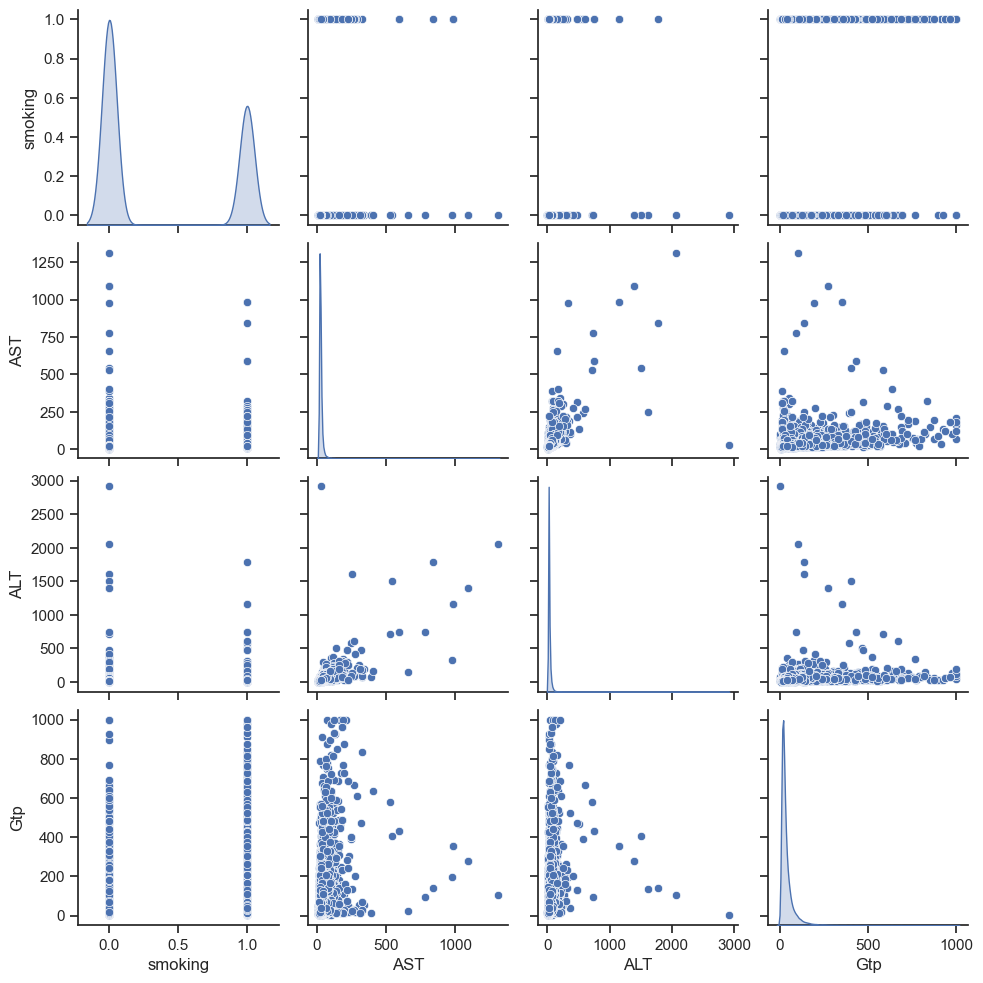

In [26]:
sns.set(style="ticks")
sns.pairplot(df[variables], diag_kind='kde')
plt.show

En los anteriores graficos utilizamos la librería **Seaborn** y su función **Pairplot** la cual nos permitió crear graficos de dispersión con las diferentes combinaciones entres las variables que estamos tratando.En este caso, no es posible afirmar que existe alguna relación entre la variable Smoking con el resto de variables con la que se pueda concluir alguna información clara. 

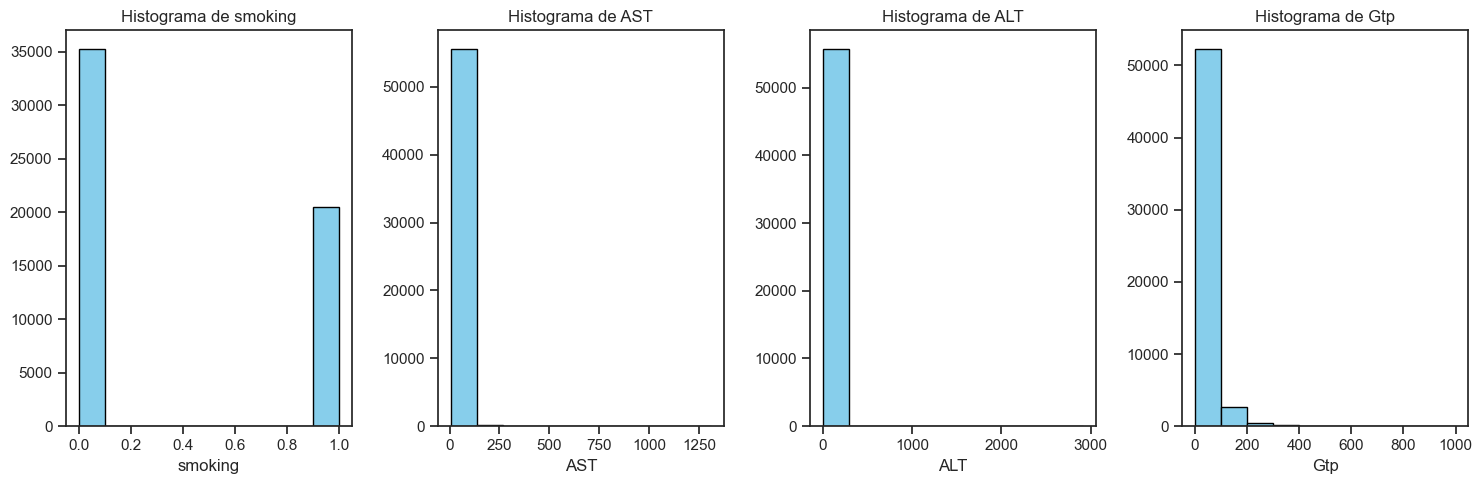

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(15,5))
for i, var in enumerate(variables):
    axs[i].hist(df[var], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {var}')
    axs[i].set_xlabel(var)

plt.tight_layout()
plt.show()

En este caso podemos mostrar a través de un hitograma la frecuencia absoluta asociada al número de registros relacionados con las variables en estudio, en este caso, podemos identificar que existe una diferencia de aproximadamente 15 mil registros entre las personas no fumadoras y fumadoras, sindo esta ultima la correspondiente al número más bajo de registros. Las graficas asociadas a las variables médicas epaticas AST, ALT, Gtp indican que la población en estudio se encuentra dentro del mismo rango con relación a sus analisis médicos asociados a estos parametros. 

In [60]:
correlation_matr =df[['AST','ALT','smoking', 'Gtp']].corr()

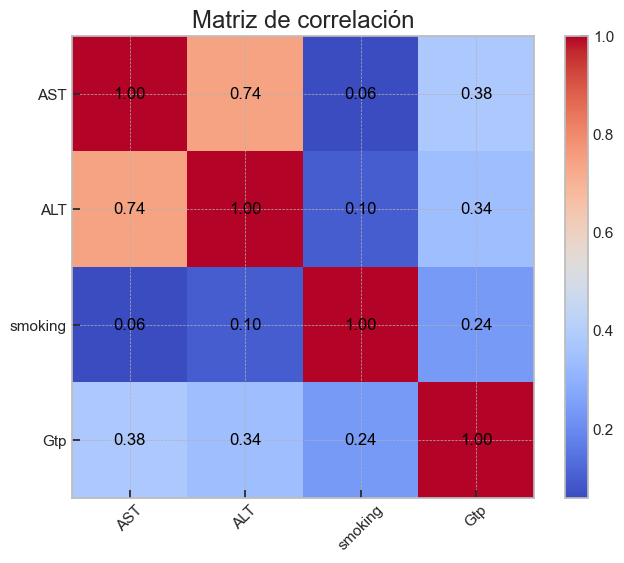

In [61]:
plt.figure(figsize=(8,6))
plt.imshow(correlation_matr, cmap='coolwarm', interpolation='nearest')


for i in range(len(correlation_matr)):
    for j in range(len(correlation_matr)):
        plt.text(j, i, '{:.2f}'.format(correlation_matr.iloc[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(range(len(correlation_matr)), correlation_matr.columns, rotation=45)
plt.yticks(range(len(correlation_matr)), correlation_matr.columns)
plt.title('Matriz de correlación')
plt.show()

En nuestra grafica de correlación es posible apreciar que en su mayoria no existe relación lineal entre la mayoría de los parametros, a excepción del ALT y el AST los cuales tienen un indice de correlación superior a 0.7, esto se debe a que ambas son enzimas que trabajan juntas desarrollando funciones hepáticas, y cuando existe un daño en el higado ambas son liberadas en gran proporción  como medida contingente. 

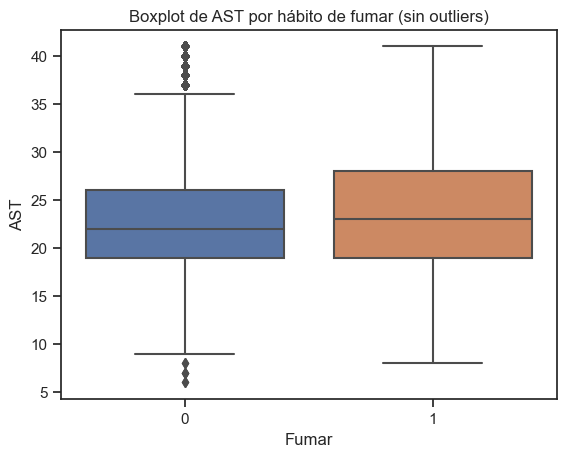

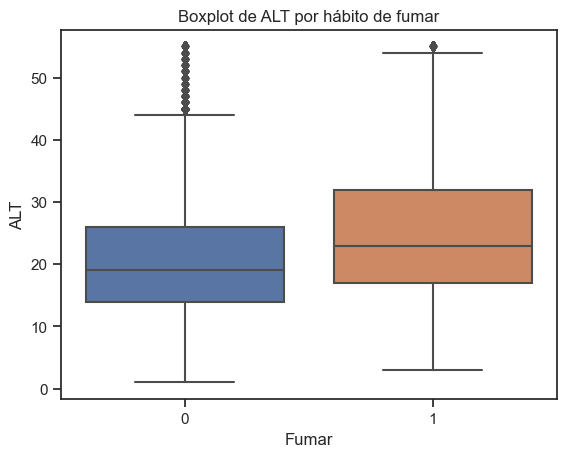

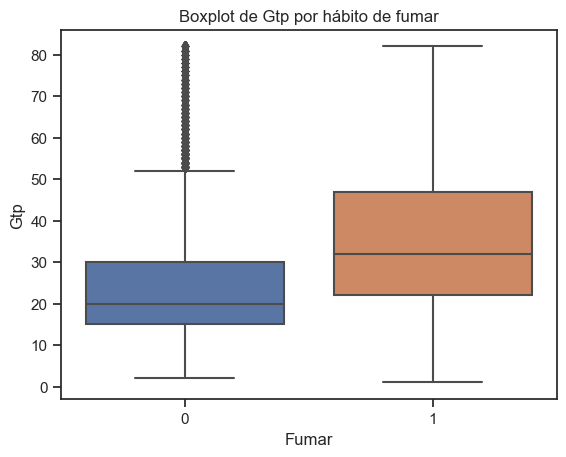

In [67]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

df_no_outliers_ast = remove_outliers(df, 'AST')
df_no_outliers_alt = remove_outliers(df, 'ALT')
df_no_outliers_gtp = remove_outliers(df, 'Gtp')


sns.boxplot(x='smoking', y='AST', data=df_no_outliers_ast)
plt.title('Boxplot de AST por hábito de fumar (sin outliers)')
plt.xlabel('Fumar')
plt.ylabel('AST')
plt.show()

sns.boxplot(x='smoking', y='ALT', data=df_no_outliers_alt)
plt.title('Boxplot de ALT por hábito de fumar')
plt.xlabel('Fumar')
plt.ylabel('ALT')
plt.show()

sns.boxplot(x='smoking', y='Gtp', data=df_no_outliers_gtp)
plt.title('Boxplot de Gtp por hábito de fumar')
plt.xlabel('Fumar')
plt.ylabel('Gtp')
plt.show()

Para desarrollar nuestros graficos Boxplot creamos la función **remove_outliers** para mejorar la visibilidad e interprepación del mismo eliminando los outliers generados durante la primera ejecución del código. Posterior a ello utilizamos la librería de seaborncon la que llamamos a cada una de las variables donde se había almacenado la función junto con el parametro medico correspondiete. Aun podemos validar muchos outlier para las graficas relacionadas con los no fumadores dado a que el número de registros en esta categoría era mucho mayor que el de los fumadores. 
Se puede notar que la linea de Q2 se encuentra en su mayoría cerca de Q1, lo que nos indica una concentración relativa alta de los valores del extremo inferior y esto se puede deber a la presencia de los valores atipicos en la parte superior o que en este caso los valores de Gtp, ALT y AST son mas bajos que la media. 

<h2> Método KNN (K-Nearest Neighbors Regressor)<h2>

In [58]:

X = df.drop(columns=['AST', 'ALT', 'Gtp']) 
y = df[['AST', 'ALT', 'Gtp']]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_models = []
for target in ['AST', 'ALT', 'Gtp']:
    knn = KNeighborsRegressor(n_neighbors=20)
    knn.fit(X_train_scaled, y_train[target])
    knn_models.append(knn)


for i, target in enumerate(['AST', 'ALT', 'Gtp']):
    predictions = knn_models[i].predict(X_test_scaled)
    rmse = mean_squared_error(y_test[target], predictions, squared=False)
    mae = mean_absolute_error(y_test[target], predictions)
    r2 = r2_score(y_test[target], predictions)
    print("-------------------------")
    print(" ")
    print(f"Métricas para {target}:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")


-------------------------
 
Métricas para AST:
RMSE: 17.26737949832587
MAE: 7.404048837418082
R^2: 0.011205980713902552
-------------------------
 
Métricas para ALT:
RMSE: 21.367970780704344
MAE: 11.05809767483616
R^2: 0.1255996087257394
-------------------------
 
Métricas para Gtp:
RMSE: 43.861098657030254
MAE: 20.750704731124873
R^2: 0.18556551360601292


Se implemento del método K-Nearest Neighbors Regressor dado que el objetivo corresponde a la estimación del impacto del hábito de fumar en algunos parametros especificos de la salud humana. Para ello se tuvo en cuenta el algorítmo en custion que validando el promedio de los valores de las muestras vecinas logra predecir el valor númerico del nuevo punto. 
Se tomo un valor de K=20 para ajustar el resultado de las metricas RMSE, MAE y R^2, dado que con valores inferiores dichas metricas estaban mucho màs alejadas de los valores aceptables, en este caso el **Error cuadratico medio** se encuentra muy alejado de cero en los tres parametros de salud medidos (AST,ALT,Gtp), lo que implica poco ajuste al modelo, por lo que la predicción estará muy alejada de un valor correcto. En relación con el **Error absoluto medio** se puede apreciar que los valores son un poco altos, por lo que el modelo de predicción está aljado de los valores reales, en este caso, el parametro con un dato más aceptable sería el AST dado que su valor es muy pequeño a comparación del ALT y Gtp.
**El R^2** en este caso nos está indicando que al ser los valores muy bajos y alejados de 1, el modelo no tiene un fuerte ajuste, por lo que el modelo explicará una menor proporción de la variabilidad de las variables dependientes.

<h2>Conclusiones</h2>

1. Podemos decir, luego del análsis visual de los gráficos generados a partir de los diferentes métos, que no es posible afirmar una relación aparente entre las enzimas Gtp, ALT y AST con elconsumo del cigarrillo, dado que los datos no muestran dependencia y/o no se valida un efecto claro que nos ayude a  no negar la hipótesis inicial. 

2. Es posible afirmar que el modelo aplicado para realizar la estimación de la relación de las variables en el data freame asociadas a los parametros de salud medidos, no está ajustado correctamente, por lo que no arrojará un valor aceptable que nos permita generar concluciones sobre la relación buscada entre dichos parametros de salud y la actividad de fumar. Será necesario realizar correcciones al modelo que generen datos más confiables que puedan ser usados para cumplir con el modelo de negocio planteado.